In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the score data

data = pd.read_csv('Data/game_scores.csv')
data.head()

,Unnamed: 0,Season,Week,Team,TeamPoints,OpponentPoints,YardsFor,YardsAgainst,Opponent,MatchString
0,0,2018,1,PHI,18.0,12.0,232.0,299.0,ATL,20181PHIATL
1,1,2018,1,ATL,12.0,18.0,299.0,232.0,PHI,20181ATLPHI
2,2,2018,1,NO,40.0,48.0,475.0,529.0,TB,20181NOTB
3,3,2018,1,TB,48.0,40.0,529.0,475.0,NO,20181TBNO
4,4,2018,1,BAL,47.0,3.0,369.0,153.0,BUF,20181BALBUF


In [3]:
# Build a dataframe summaraizing a team's defensive performance for each season

df_def = data[['Season', 'Team', 'OpponentPoints']].groupby(by = ['Team', 'Season']).mean().reset_index()
df_def.rename(mapper = {'OpponentPoints': 'DefensiveStrength'},
              axis = 1,
             inplace = True)
df_def

,Team,Season,DefensiveStrength
0,ARI,2018,26.562500
1,ARI,2019,27.625000
2,ARI,2020,22.937500
3,ARI,2021,18.363636
4,ATL,2018,26.437500
...,...,...,...
123,TEN,2021,23.090909
124,WAS,2018,22.437500
125,WAS,2019,27.187500
126,WAS,2020,20.562500


In [4]:
# Save home_pa as a defensive_ranking dataframe
df_def.to_csv('Data/defensive_ranking.csv')

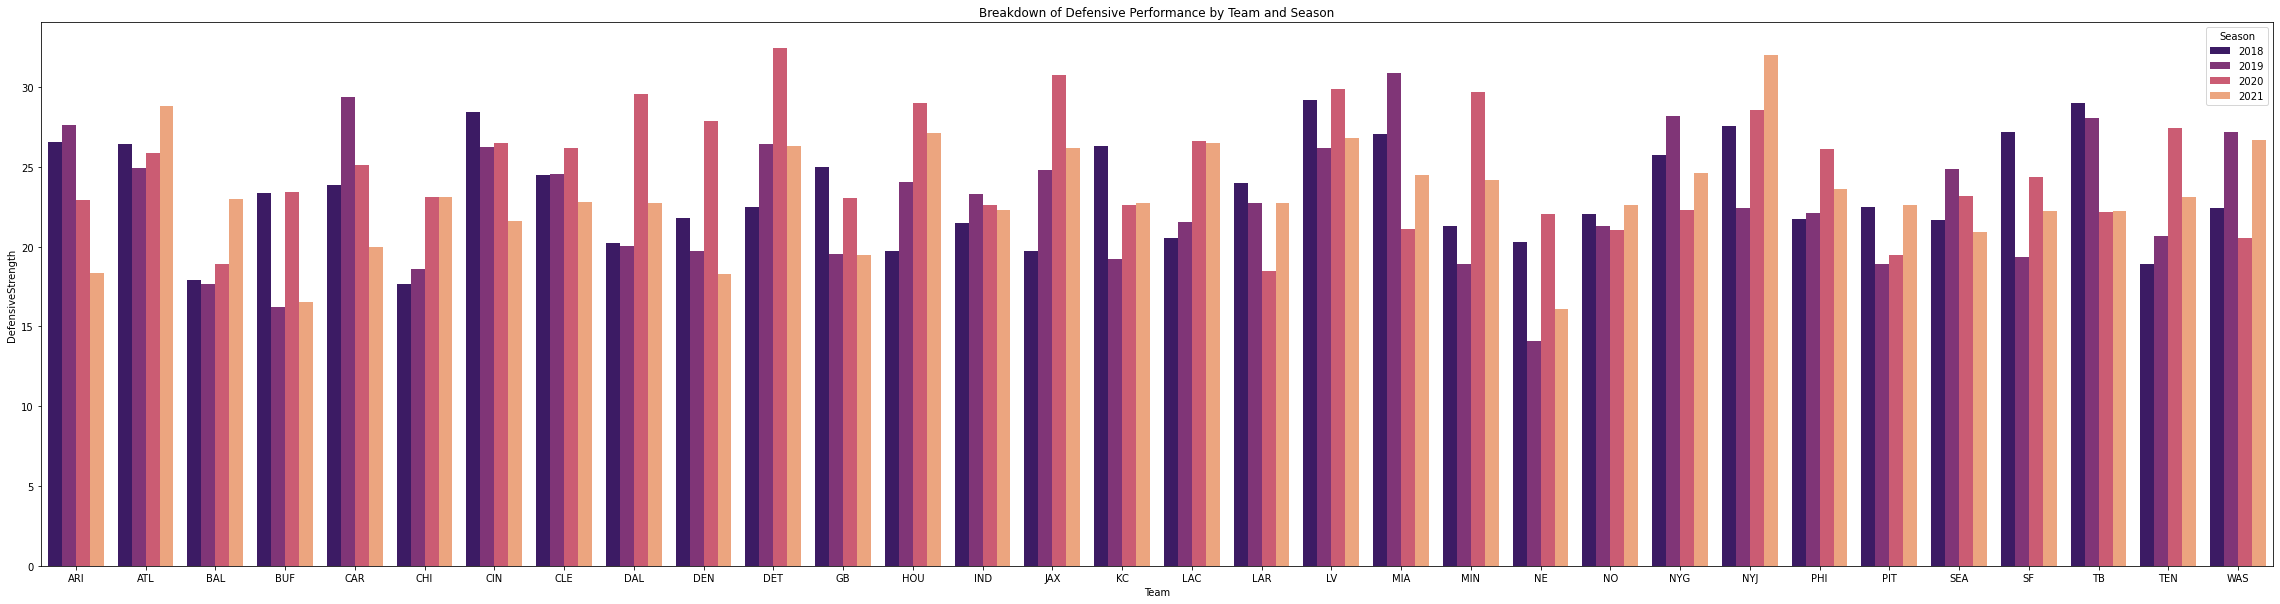

In [6]:
plt.figure(figsize = (40, 10))

sns.barplot(x = df_def['Team'],
           y = df_def.DefensiveStrength,
           data = df_def,
           hue = df_def['Season'],
           palette = 'magma')

plt.title('Breakdown of Defensive Performance by Team and Season')
plt.show()

We can see in the above chart that team defensive performance can vary quite substantially over the course of the season.  As such, it would not be sufficient for our model to just impute an average defensive score for each team through the dataset.  So we will break these stats down and by season and apply a seasonal defensive average for every opponent. <br><br>

In [7]:
# Build a dataframe summaraizing a team's offensive performance for each season

df_off = data[['Season', 'Team', 'TeamPoints']].groupby(by = ['Team', 'Season']).mean().reset_index()
df_off

,Team,Season,TeamPoints
0,ARI,2018,14.062500
1,ARI,2019,22.562500
2,ARI,2020,25.625000
3,ARI,2021,28.181818
4,ATL,2018,25.875000
...,...,...,...
123,TEN,2021,26.454545
124,WAS,2018,17.562500
125,WAS,2019,16.625000
126,WAS,2020,20.937500


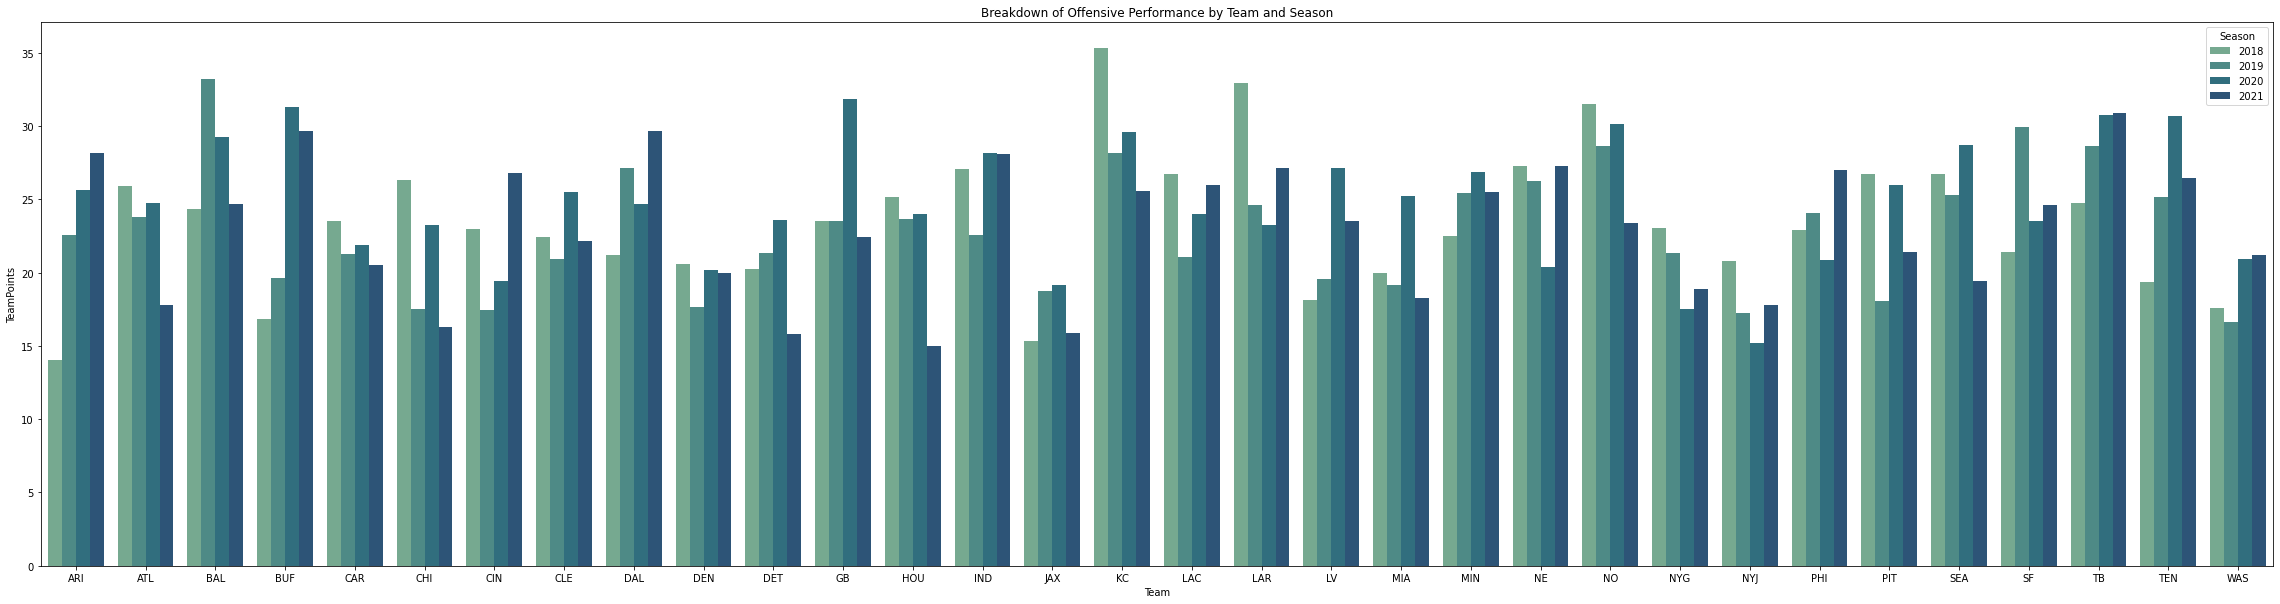

In [8]:
plt.figure(figsize = (40, 10))

sns.barplot(x = df_off['Team'],
           y = df_off.TeamPoints,
           data = df_off,
           hue = df_off['Season'],
           palette = 'crest')
plt.title('Breakdown of Offensive Performance by Team and Season')
plt.show()

As with defensive production, we gain a lot more information about the offensive performance of a team if we break it down by season.

# Create a timeline of how teams perform offensively and defensively

In [9]:
# Design a function to get the desired data out.

team_performance = pd.DataFrame(columns = ['Season', 'Week', 'Team', 'PointsFor', 
                                                'PointsAgainst', 'YardsFor', 'YardsAgainst'])

for row in range(len(data)):
    team_performance = team_performance.append({'Season': data.iloc[row]['Season'],
                                 'Week': data.iloc[row]['Week'],
                                 'Team': data.iloc[row]['Team'],
                                 'PointsFor': data.iloc[row]['TeamPoints'],
                                 'PointsAgainst': data.iloc[row]['OpponentPoints'],
                                 'YardsFor': data.iloc[row]['YardsFor'],
                                 'YardsAgainst': data.iloc[row]['YardsAgainst']}, ignore_index = True)


In [10]:
team_performance

,Season,Week,Team,PointsFor,PointsAgainst,YardsFor,YardsAgainst
0,2018,1,PHI,18.0,12.0,232.0,299.0
1,2018,1,ATL,12.0,18.0,299.0,232.0
2,2018,1,NO,40.0,48.0,475.0,529.0
3,2018,1,TB,48.0,40.0,529.0,475.0
4,2018,1,BAL,47.0,3.0,369.0,153.0
...,...,...,...,...,...,...,...
2075,2021,18,KC,NaN,NaN,NaN,NaN
2076,2021,18,LAR,NaN,NaN,NaN,NaN
2077,2021,18,SF,NaN,NaN,NaN,NaN
2078,2021,18,ARI,NaN,NaN,NaN,NaN


[]

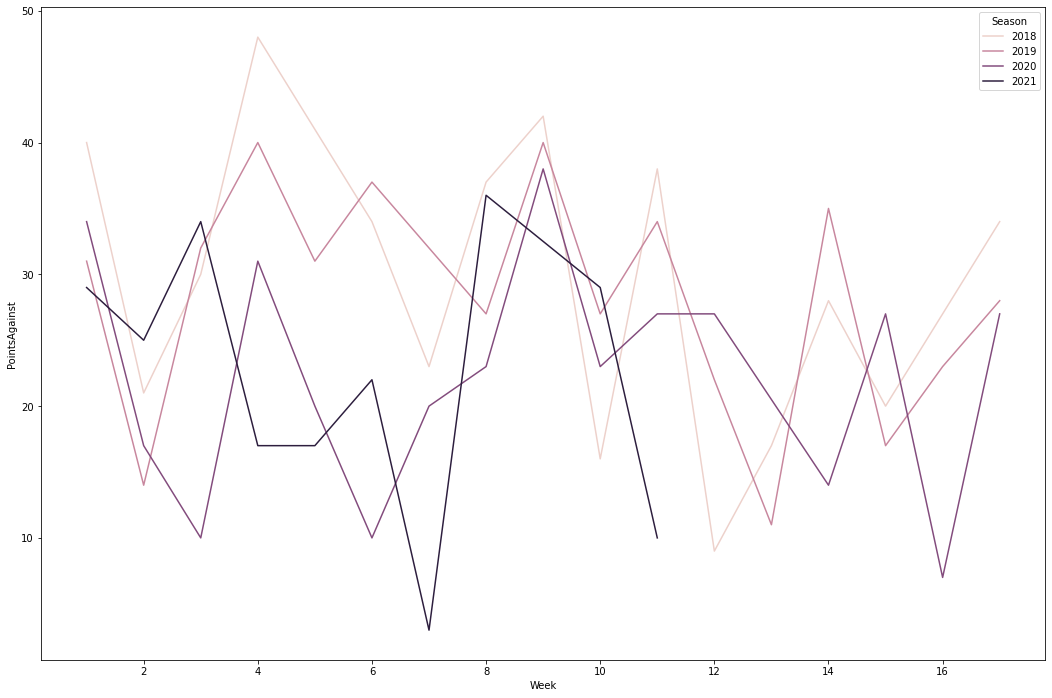

In [11]:
# Plot team offensive performances for 2021

plt.figure(figsize = (18,12))

sns.lineplot(x = team_performance['Week'],
            y = team_performance[team_performance['Team'] == 'TB']['PointsAgainst'],
            hue = team_performance['Season'])
plt.plot()

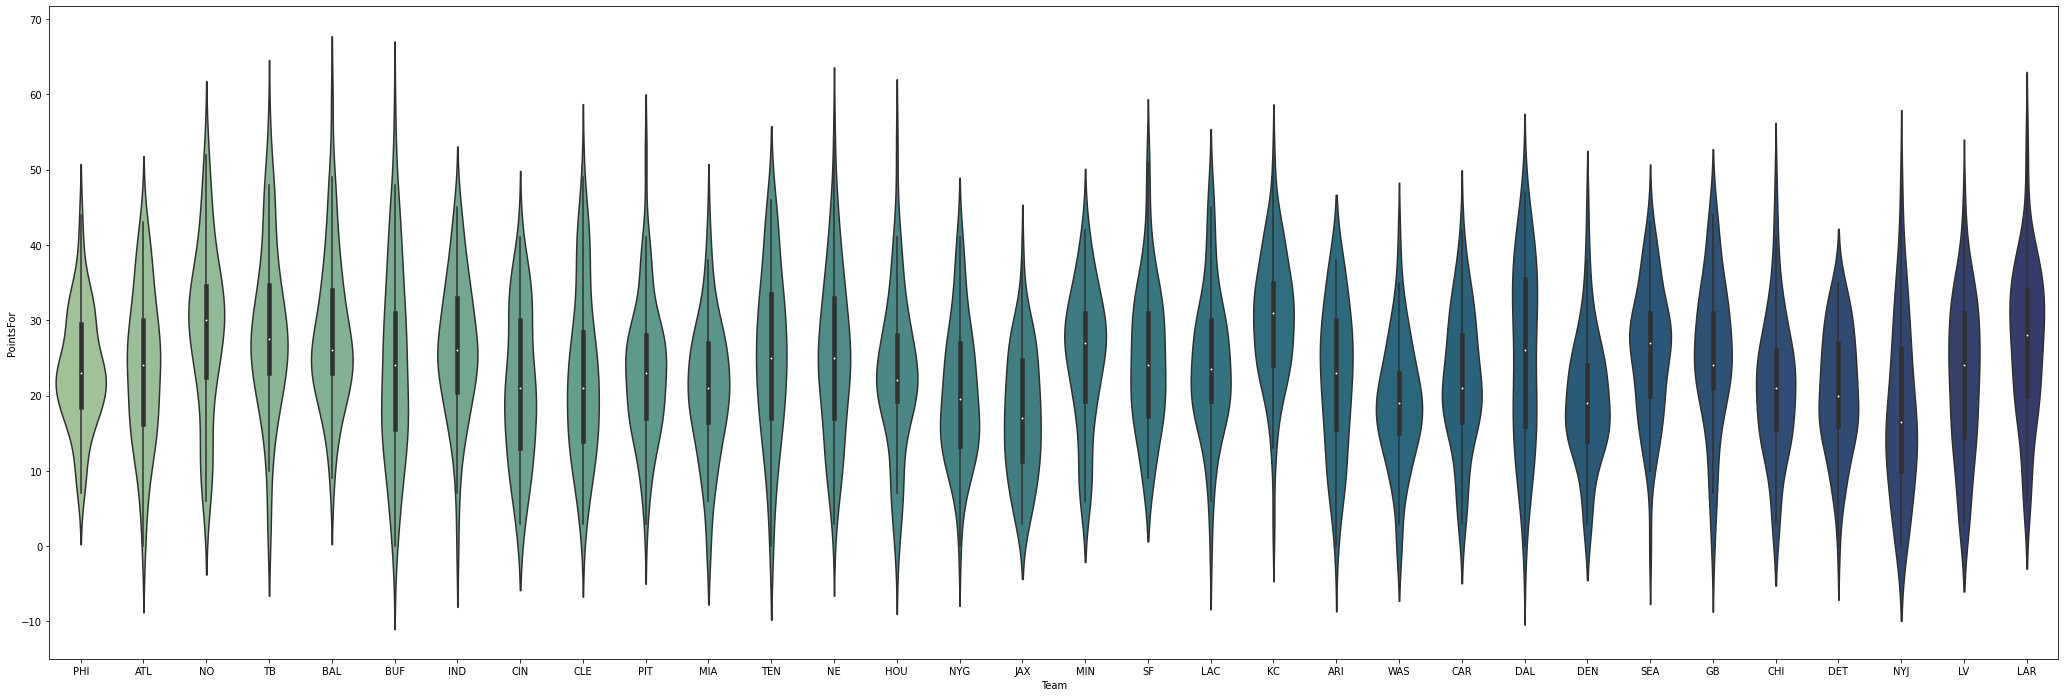

In [12]:
plt.figure(figsize = (36,12))
sns.violinplot(x = team_performance['Team'],
              y = team_performance["PointsFor"],
              palette = 'crest')
plt.show()

In [13]:
team_performance.describe()

,PointsFor,PointsAgainst,YardsFor,YardsAgainst
count,1872.000000,1872.000000,1872.000000,1872.000000
mean,23.547543,23.547543,352.579594,352.579594
std,10.176732,10.176732,87.176453,87.176453
min,0.000000,0.000000,47.000000,47.000000
25%,17.000000,17.000000,292.000000,292.000000
50%,24.000000,24.000000,354.000000,354.000000
75%,31.000000,31.000000,413.000000,413.000000
max,59.000000,59.000000,643.000000,643.000000
